## Keras CV

Keras CV es una librería de visión por ordenador. **Importamos la librería de la manera siguiente**.

In [11]:
import keras_cv; import numpy as np; import matplotlib.pyplot as plt; import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf; import tensorflow_datasets as tfds


Esto son algunos **backbones, o modelos preentrenados** que están **descabezados** y pensados para clasificación, extracción de características. La cabeza se ajusta posteriormente a la tarea de clasificación concreta. En esta práctica nos centraremos en ResNet.

CSPDarkNet: https://keras.io/api/keras_cv/models/backbones/csp_darknet 
DenseNet: https://keras.io/api/keras_cv/models/backbones/densenet
EfficientNetV1: https://keras.io/api/keras_cv/models/backbones/efficientnet_v1
EfficientNetV2: https://keras.io/api/keras_cv/models/backbones/efficientnet_v2
EfficientNet Lite: https://keras.io/api/keras_cv/models/backbones/efficientnet_lite
MixTransformer: https://keras.io/api/keras_cv/models/backbones/mix_transformer
MobileNetV3: https://keras.io/api/keras_cv/models/backbones/mobilenet_v3
ResNetV1: https://keras.io/api/keras_cv/models/backbones/resnet_v1
ResNetV2: https://keras.io/api/keras_cv/models/backbones/resnet_v2
VGG16: https://keras.io/api/keras_cv/models/backbones/vgg16
ViTDet: https://keras.io/api/keras_cv/models/backbones/vitdet
YOLOV8: https://keras.io/api/keras_cv/models/backbones/yolo_v8

También hay librerias para hacer segmentación y detectación de _bounding boxes_ en imágenes. Pero no se cubrirán en la práctica

Ahora cargaremos el constructor de datasets de TensorFlow. List builder proporciona un listado de conjuntos de datos.

In [12]:
list = tfds.list_builders()
print(f'Primeros 100 de {len(list)}:', list[:100])

Primeros 100 de 432: ['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bridge_data_msr', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech

2024-12-10 23:26:37.931860: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


## Datasets de tensorflow

### Carga de datos y lectura de dataset

Permite las siguientes opciones:
- `split`, que define la partición a leer.

- `shuffle_files`, para barajar o no los datos cada nueva época.

- `data_dir`, directorio donde guardar el dataset.
 
- `with_info`, devuelve metadatos.

- `download`, habilita o inhabilita descarga.

In [13]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Podemos descargarlo con metadatos...

In [14]:
ds, info = tfds.load('mnist', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/yassin/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [15]:
# tfds.builder: tfds.load es un wrapper. tfds.core.DatasetBuilder es la clase base para todos los datasets.

builder = tfds.builder('mnist')
builder.download_and_prepare()
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


### Iterar sobre un dataset

Podemos consultarlo como un diccionario de python...

In [16]:
ds = tfds.load('mnist', split='train'); ds = ds.take(1) # Only take a single example
for example in ds: # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(example.keys()); print(example["image"].shape, example["label"])

dict_keys(['image', 'label'])
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2024-12-10 23:26:43.346574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-12-10 23:26:43.347621: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


O como una tupla

In [17]:
ds = tfds.load('mnist', split='train', as_supervised=True); ds = ds.take(1) # Only take a single example
for image, label in ds: # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2024-12-10 23:26:44.508866: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Visualización del dataset

In [18]:
ds, info = tfds.load('mnist', split='train', with_info=True)
tfds.as_dataframe(ds.take(4), info)

2024-12-10 23:26:45.687558: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-12-10 23:26:45.687742: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,image,label
0,,4
1,,1
2,,0
3,,7


2024-12-10 23:26:47.340145: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


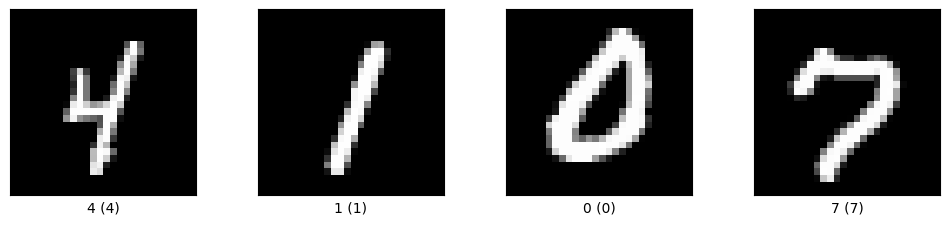

In [19]:
ds, info = tfds.load('mnist', split='train', with_info=True)
fig = tfds.show_examples(ds, info, rows=1, cols=4)

## MNIST con Keras

In [20]:
(ds_train, ds_test), ds_info = tfds.load(
  'mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

### Training pipeline

Se utilizan pipelines para transformar y procesar las imágenes con las operaciones siguientes

In [21]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

### Test pipeline

como el de training, pero sin shuffle y cache tras batch

In [22]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

### Definición del modelo, compilacióny  ajuste

Esto entrena la red neuronal definiendo la red mediante el método sequential. Es una red que no usa convoluciones. Toma la imagen, la aplana, la pasa por una capa densa RELU de 128 neuronas y por una última salida de 10 neuronas para la clasificación.

Se define el optimizador Adam y se trabaja directamente con logits, es decir, no hay capa de softmax, que son valores reales en lugar de probabilidades. Se define como métrica teniendo en cuenta que es una red categórica.

La novedad está en que el dataset es ds_train, y ds_test, un dataset propio de TensorFlow

In [23]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28, 1)), # Aplana la entrada
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)]) # Capa de 10 neuronas para clasificación 
model.compile(
  optimizer=keras.optimizers.Adam(0.001),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(ds_train, epochs=6, validation_data=ds_test);

Epoch 1/6


/home/yassin/anaconda3/envs/per/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6301 - sparse_categorical_accuracy: 0.8264 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9426
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1847 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1403 - val_sparse_categorical_accuracy: 0.9575
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0.9647 - val_loss: 0.1131 - val_sparse_categorical_accuracy: 0.9673
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.0998 - val_sparse_categorical_accuracy: 0.9712
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.0938 - val_sparse_categorical_accuracy: 0.9716
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0865 - val_sparse_categorical_accuracy: 0.9725


# Ejemplo con CIFAR-10

In [24]:
import os; os.environ["KERAS_BACKEND"] = "tensorflow"; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; import tensorflow_datasets as tfds; import keras; import keras_cv
keras.utils.set_random_seed(23)
(train, test), info = tfds.load("cifar10", split=['train', 'test'], with_info=True, as_supervised=True)
print(info.description, "\n\n", info.splits, "\n\n", info.features)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

 {'train': <SplitInfo num_examples=50000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>} 

 FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


2024-12-10 23:27:16.815707: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


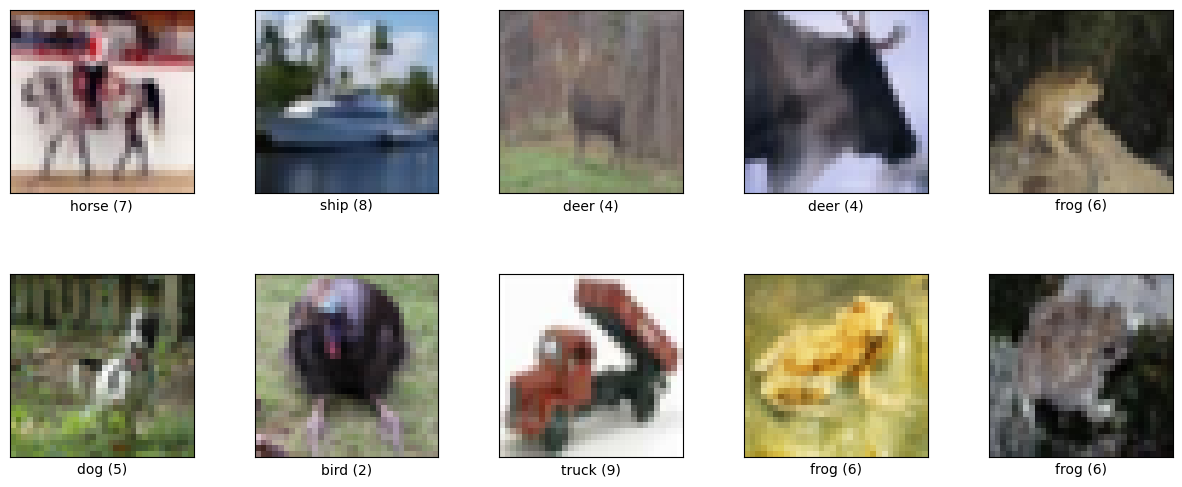

In [26]:
fig = tfds.show_examples(train, info, rows=2, cols=5)

### Transfer Learning

Métodos de preproceso y caché en la carga de datos. Lo que hace esto es pasar a 1 hot encoding cada etiquieta de clase. Se hace batches de 10 grupos. Lo mismo para conjunto de test sin hacer el barajado. 

In [27]:
def normalize_images(images, labels):
  return tf.cast(images, tf.float32), tf.one_hot(labels, 10)
train = train.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32; train = train.cache().shuffle(10 * batch_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test = test.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [34]:
import os; os.environ["KERAS_BACKEND"] = "tensorflow"; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; import tensorflow_datasets as tfds; import keras; import keras_cv
keras.utils.set_random_seed(23)
(train, test), info = tfds.load("cifar10", split=['train', 'test'], with_info=True, as_supervised=True)
print(info.description, "\n\n", info.splits, "\n\n", info.features)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

 {'train': <SplitInfo num_examples=50000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>} 

 FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


Las capas de redimensión se hacen para adecuar la entrada, pueden hacerse también dentro del método normalize.
 
Se carga la resNet sin la cabeza.

In [ ]:
import time; start = time.time()
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)(inputs)
x = keras.layers.Resizing(224, 224, interpolation="nearest")(x) # 224x224x3 en ResNet50V2
backbone = keras.applications.resnet_v2.ResNet50V2(include_top=False)
# backbone = keras_cv.models.ResNetV2Backbone.from_preset("resnet50_v2_imagenet", include_rescaling=False)
backbone.trainable = False
x = backbone(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units=800, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)
M = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.Adam(learning_rate=0.001)
M.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
check = keras.callbacks.ModelCheckpoint('cifar10.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.3, patience=5, min_delta=0.0005, min_lr=0.0)
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.0005)
H = M.fit(train, epochs=100, validation_data=test, verbose=1, callbacks=[check, early, reduce])
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss'); # ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', label='train')
ax.plot(xx, H.history['val_loss'], color='r', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy'); # ax.set_xticks(xx)
ax.plot(xx, H.history['accuracy'], color='b', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', label='val'); ax.legend();

### Fine Tuning

In [32]:
import os; os.environ["KERAS_BACKEND"] = "tensorflow"; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; import tensorflow_datasets as tfds; import keras; import keras_cv
keras.utils.set_random_seed(23)
train, test = tfds.load("cifar10", split=['train', 'test'], as_supervised=True)

In [33]:
def normalize_images(images, labels):
  return tf.cast(images, tf.float32), tf.one_hot(labels, 10)
train = train.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32; train = train.cache().shuffle(10 * batch_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test = test.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
import time; start = time.time()
M = keras.models.load_model('cifar10.keras')
for layer in M.layers:
  if not isinstance(layer, keras.layers.BatchNormalization):
    layer.trainable = True
opt = keras.optimizers.Adam(learning_rate=1e-5)
M.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
check = keras.callbacks.ModelCheckpoint('cifar10ft.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce = keras.callbacks.ReduceLROnPlateau(
  monitor='val_accuracy', factor=0.3, patience=5, min_delta=0.0005, min_lr=0.0)
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.0005)
H = M.fit(train, epochs=100, validation_data=test, verbose=1, callbacks=[check, early, reduce])
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

In [ ]:
ig, axes = plt.subplots(1, 2, figsize=(12, 4)); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss'); # ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', label='train')
ax.plot(xx, H.history['val_loss'], color='r', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy'); # ax.set_xticks(xx)
ax.plot(xx, H.history['accuracy'], color='b', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', label='val'); ax.legend();

### Aumento de datos

In [36]:
import os; os.environ["KERAS_BACKEND"] = "tensorflow"; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; import tensorflow_datasets as tfds; import keras; import keras_cv
keras.utils.set_random_seed(23)
train, test = tfds.load("cifar10", split=['train', 'test'], as_supervised=True)

In [ ]:
def normalize_images(images, labels):
  return tf.cast(images, tf.float32), tf.one_hot(labels, 10)

random_flip = keras_cv.layers.RandomFlip("horizontal")
def augment_images(images, labels):
  images = random_flip(images)
  return normalize_images(images, labels)

train = train.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32; train = train.cache().shuffle(10 * batch_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test = test.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
import time; start = time.time()
M = keras.models.load_model('cifar10ft.keras')
# M.summary(line_length=95, positions=[0.59, 0.82, 0.94, 1.], show_trainable=True)
for layer in M.layers:
  if not isinstance(layer, keras.layers.BatchNormalization):
    layer.trainable = True
#opt = keras.optimizers.Adam(learning_rate=1e-5)
#M.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
check = keras.callbacks.ModelCheckpoint('cifar10fta.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce = keras.callbacks.ReduceLROnPlateau(
monitor='val_accuracy', factor=0.3, patience=5, min_delta=0.0005, min_lr=0.0)
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.0005)
H = M.fit(train, epochs=100, validation_data=test, verbose=1, callbacks=[check, early, reduce])
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))